# Test `wave_height_period` Figure Module

Render figure object produced by the `nowcast.figures.wwatch3.wave_height_period` module.
Provides data for visual testing to confirm that refactoring has not adversely changed figure for web page.

Set-up and function call replicates as nearly as possible what is done in the `nowcast.workers.make_plots` worker.

Notebooks like this should be developed in a
[Nowcast Figures Development Environment](https://salishsea-nowcast.readthedocs.io/en/latest/figures/fig_dev_env.html)
so that all of the necessary dependency packages are installed.

In [1]:
import io
from pathlib import Path

import yaml

from nowcast.figures.wwatch3 import wave_height_period

In [2]:
%matplotlib inline

In [3]:
# Supress arrow.get() parser warnings re: changes coming in v0.15.0
# See https://github.com/crsmithdev/arrow/issues/612
# We don't use date strings that aren't included in the supported date tokens set mentioned in issue #612

import warnings
from arrow.factory import ArrowParseWarning

warnings.simplefilter("ignore", ArrowParseWarning)

The bits of `config/nowcast.yaml` that are required:

In [4]:
config = '''
    figures:
        dataset URLs:
            wwatch3 fields: 
                https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSf2DWaveFields30mV17-02.nc?hs,fp
'''

config = yaml.safe_load(io.StringIO(config))

The bits that the `make_figures` worker must provide:

In [5]:
wwatch3_dataset_url = config['figures']['dataset URLs']['wwatch3 fields']

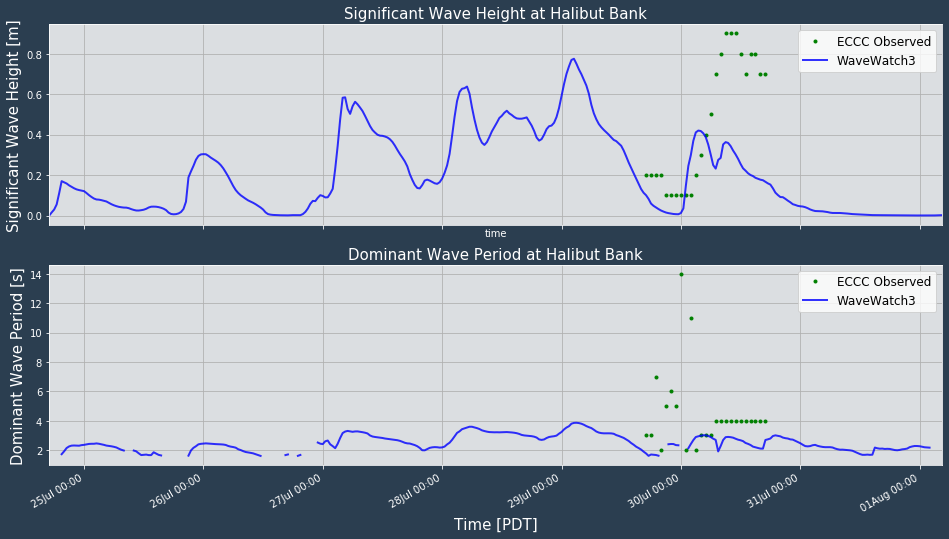

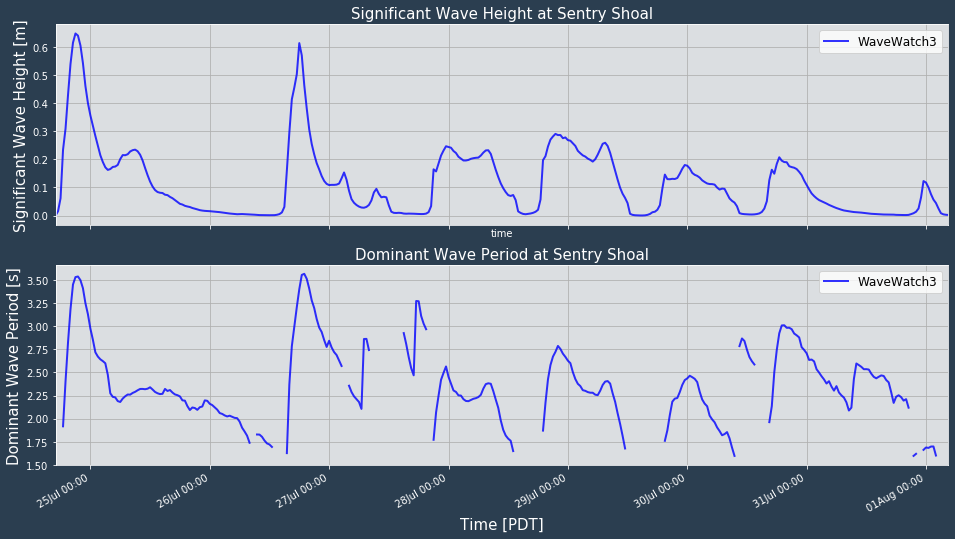

In [6]:
# %%timeit -n1 -r1

from importlib import reload
reload(wave_height_period)

buoys = [
    'Halibut Bank',
    'Sentry Shoal',
]
for buoy in buoys:
    fig = wave_height_period.make_figure(buoy, wwatch3_dataset_url)